In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

In [2]:
def plot3D(px,py,pz,clist,emphPoints = [],cmap='plasma',shadow=False,useCMAP = True):
    
    elev = 30
    azim = 60

    viewVect = [np.cos(np.pi*180/elev)*np.sin(np.pi*180/azim),np.cos(np.pi*180/elev)*np.cos(np.pi*180/azim),np.cos(np.pi*180/elev)]

    p = np.array([px,py,pz])
    dots = np.array(np.dot(viewVect,p))
    sort = dots.argsort()

    px = px[sort]
    py = py[sort]
    pz = pz[sort]
    clist = np.array(clist)[sort]

    mean_x = px.min()
    mean_y = py.min()
    mean_z = pz.min()

    Xdist = px.max() - px.min()
    Xcntr = (px.max() + px.min())/2.0
    Ydist = py.max() - py.min()
    Ycntr = (py.max() + py.min())/2.0
    Zdist = pz.max() - pz.min()
    Zcntr = (pz.max() + pz.min())/2.0

    dist = 0.6*max(Xdist,Ydist,Zdist)

    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')
    #ax.view_init(30,-60)

    listTemp = [i for i in range(len(px))]

    if useCMAP:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2,cmap = cmap)
    else:
        ax.scatter(px,py,pz,c=clist,edgecolor='black',linewidth=0.2)
    
    for p in emphPoints:
        ax.scatter([px[p]],[py[p]],[pz[p]],c='C1',s=100)

    ax.set_xlim([Xcntr - dist, Xcntr + dist])
    ax.set_ylim([Ycntr - dist, Ycntr + dist])
    ax.set_zlim([Zcntr - dist, Zcntr + dist])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    #ax.set_axis_off()
    #plt.show()
    
    if shadow:
        #fig = plt.figure(figsize = (10,10))
        #ax = fig.gca(projection='3d')
        #ax.view_init(30,-60)
        
        ax.scatter(px,py,[Zcntr - dist for p in pz],c='black',alpha=0.01)
        ax.scatter(px,[Ycntr + dist for p in py],pz,c='black',alpha=0.01)
        ax.scatter([Xcntr - dist for p in px],py,pz,c='black',alpha=0.01)

        ax.set_xlim([Xcntr - dist, Xcntr + dist])
        ax.set_ylim([Ycntr - dist, Ycntr + dist])
        ax.set_zlim([Zcntr - dist, Zcntr + dist])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        #ax.set_axis_off()
    plt.show()
    
def trianglePlot(arry,clist,emphPoints = [],dim=2):
    
    ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
    axesDist = 0.6*max(ranges)
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(10,10))
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
                for p in emphPoints:
                    axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
                axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('direction '+str(row+1))
                    axs[row,col].set_xlabel('direction '+str(col+2))
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [3]:
def CovMat_replica(data,n=1):
    dots = [[np.dot(d1,d2) for d1 in data] for d2 in data]
    if n > 0:
        dots = [[dots[i][j]**n for i in range(len(dots))] for j in range(len(dots))]
    else:
        dots = [[np.log(dots[i][j]) for i in range(len(dots))] for j in range(len(dots))]
    dots_sum = [sum(row)/len(row) for row in dots]
    dots_sum_sum = sum(dots_sum)/len(dots_sum)
    CovMat = [[dots[i][j]-dots_sum[i]-dots_sum[j]+dots_sum_sum for i in range(len(data))] for j in range(len(data))]
    distances = []
    if n > 0:
        for i in range(len(data)):
            for j in range(i+1,len(data)):
                distances.append(2*(1-dots[i][j]))
    else:
        for i in range(len(data)):
            for j in range(i+1,len(data)):
                dTemp = abs(dots[i][j])
                if dTemp > 1:
                    continue
                distances.append(-2*np.log(dTemp))
    print('finished n='+str(n))
    return [CovMat,distances,n]

In [4]:
X = []
iterations = 5000*(2**4)
for i in range(iterations):
    xTest = np.array([np.random.normal(0,1) for i in range(4)])
    use = True
    for x in xTest:
        if x < 0.0:
            use = False
            break
    if use:
        X.append(xTest)
Y = np.array([x/np.linalg.norm(x) for x in X])
len(Y)

4977

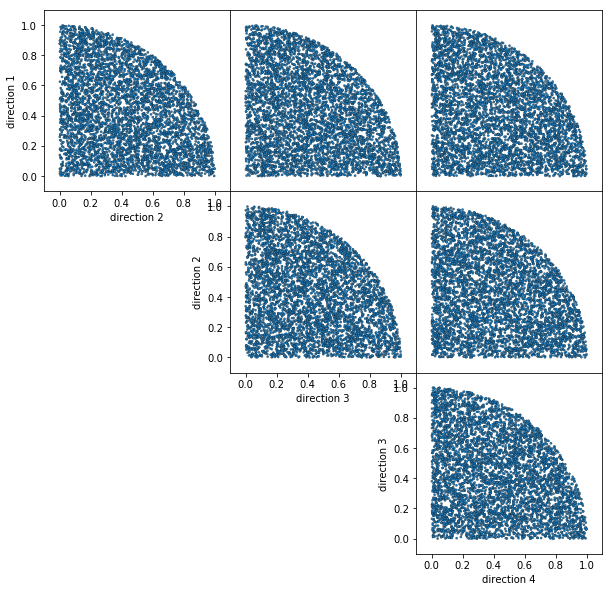

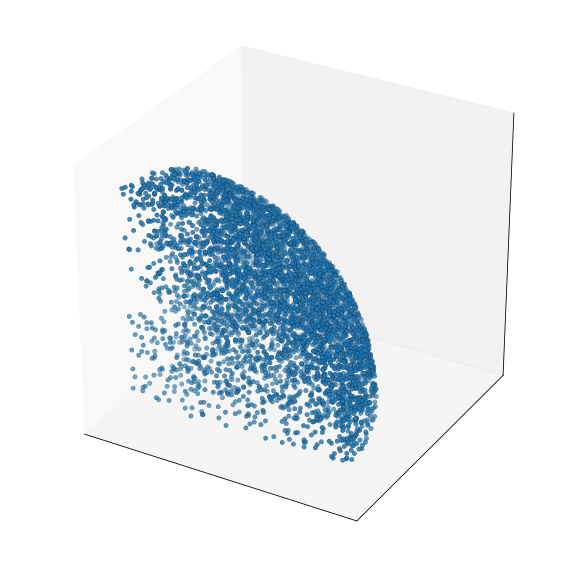

In [5]:
trianglePlot(Y,['C'+str(0) for i in range(len(Y))],dim=3)
plot3D(Y[:,0],Y[:,1],Y[:,2],['C'+str(0) for i in range(len(Y))])

In [6]:
nReplicas = [1,2,4,8,16,32,64,128]
Replicas = [CovMat_replica(Y,n=i) for i in nReplicas]

finished n=1
finished n=2
finished n=4
finished n=8
finished n=16
finished n=32
finished n=64
finished n=128


In [7]:
for row in Replicas:
    CovMat,distances,n = row
    w,vt = np.linalg.eig(CovMat)
    w = abs(w[0:4].real)
    v = vt.T.real[0:4]
    projMatEigs = np.dot(v.T,np.diag(np.sqrt(w)))
    row.append(projMatEigs)
    print('finished n='+str(n))

finished n=1
finished n=2
finished n=4
finished n=8
finished n=16
finished n=32
finished n=64
finished n=128


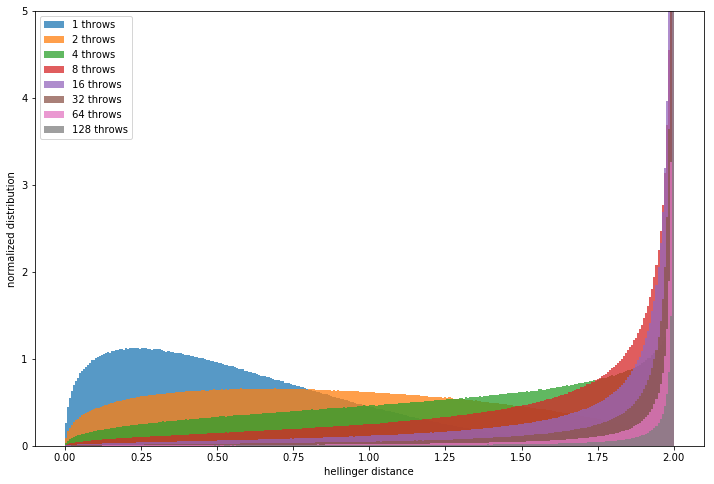

In [8]:
plt.figure(figsize=(12,8))
for CovMat,distances,n,projMatEigs in Replicas:
    n, bins, patches = plt.hist(distances,300,normed=1,alpha=0.75,label=str(n)+' throws')
plt.legend()
plt.xlabel('hellinger distance')
plt.ylabel('normalized distribution')
plt.ylim([0,5])
plt.show()

1  Tosses


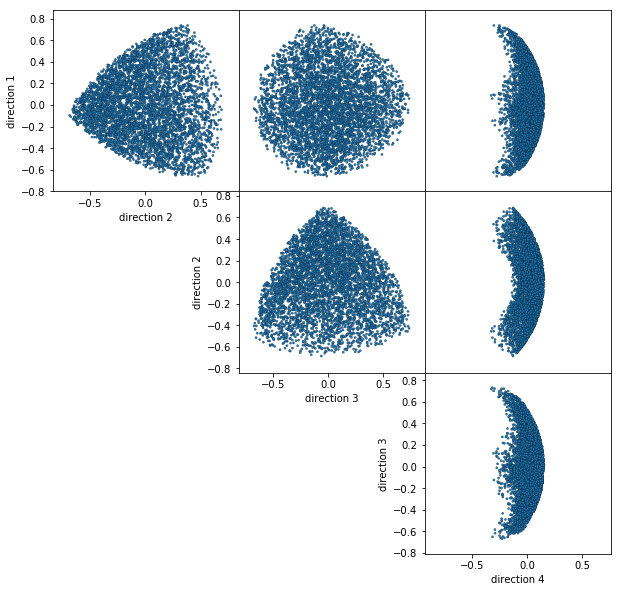

2  Tosses


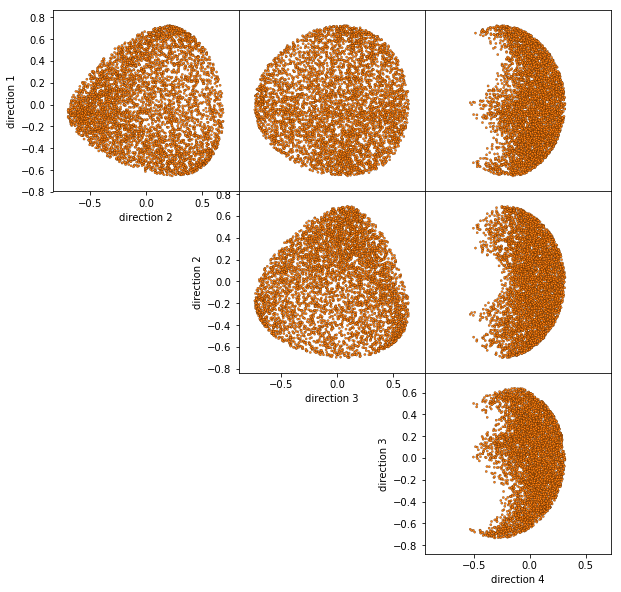

4  Tosses


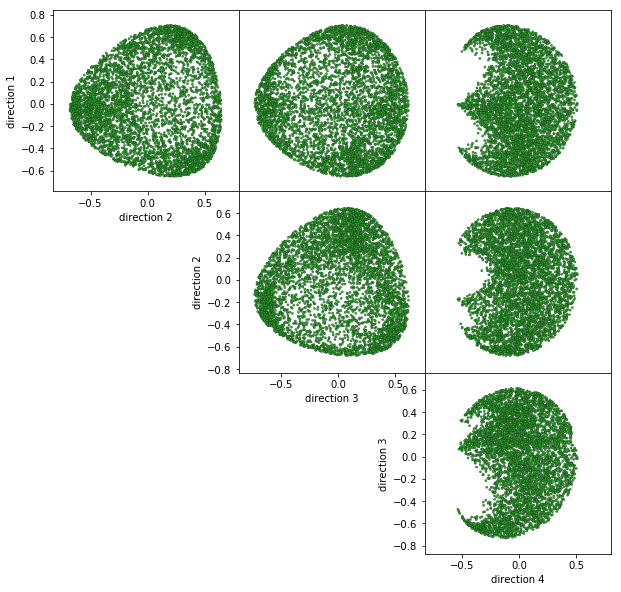

8  Tosses


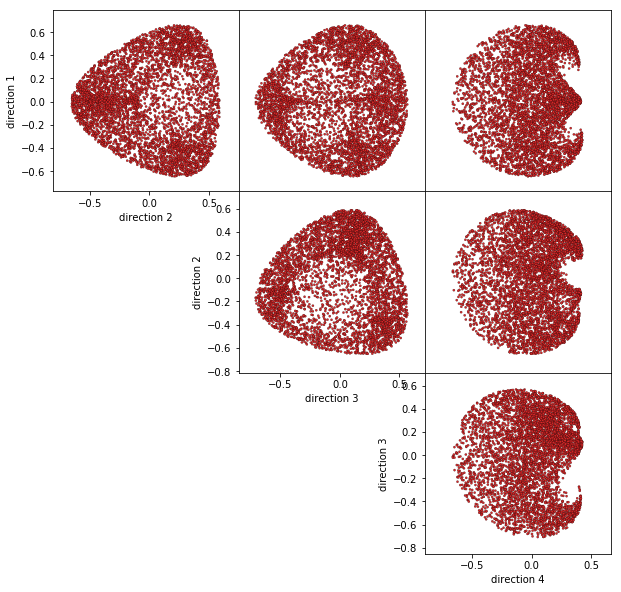

16  Tosses


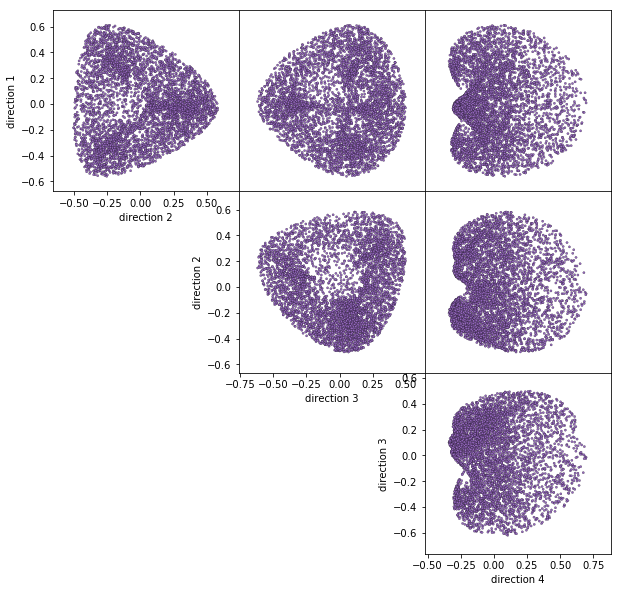

32  Tosses


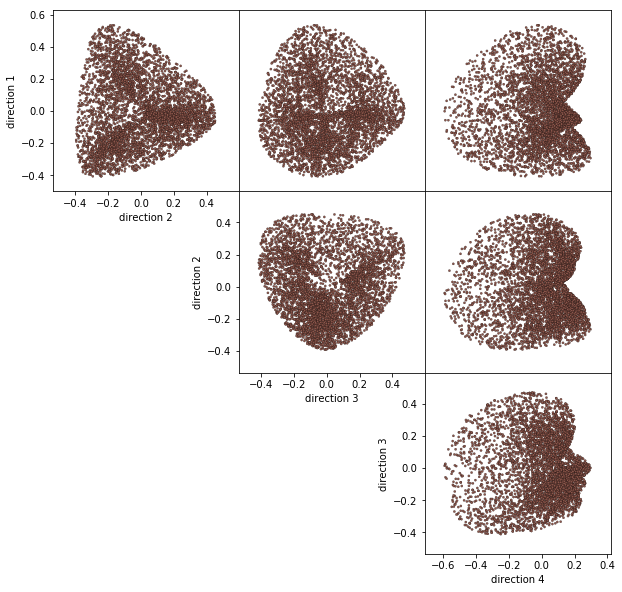

64  Tosses


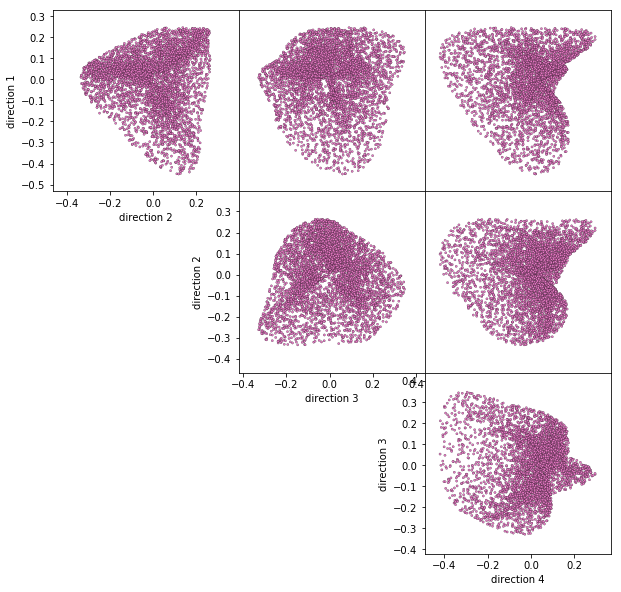

128  Tosses


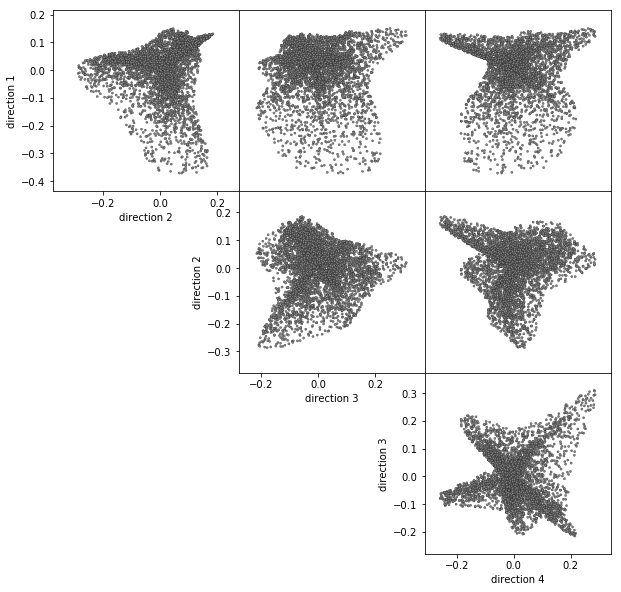

In [9]:
#plot3D(projMatEigs[:,0],projMatEigs[:,1],projMatEigs[:,2],['r' for i in range(len(projMatEigs))])
indx = 0
for row in Replicas:
    CovMat,distances,n,projMatEigs = row
    print(n,' Tosses')
    trianglePlot(projMatEigs,['C'+str(indx) for i in range(len(projMatEigs))],dim=3)
    indx += 1

1  Tosses


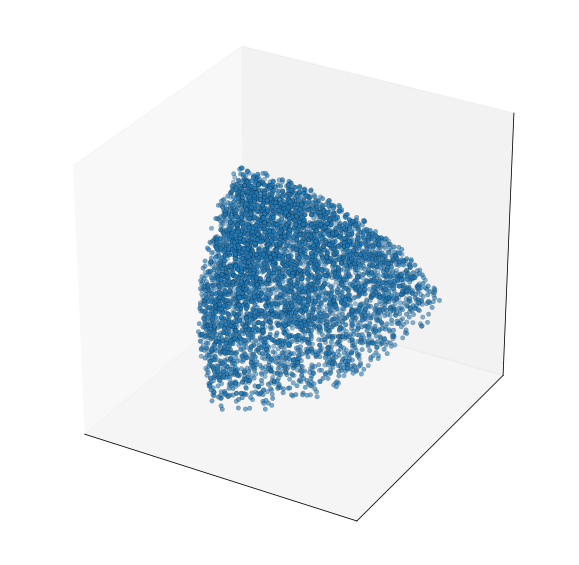

2  Tosses


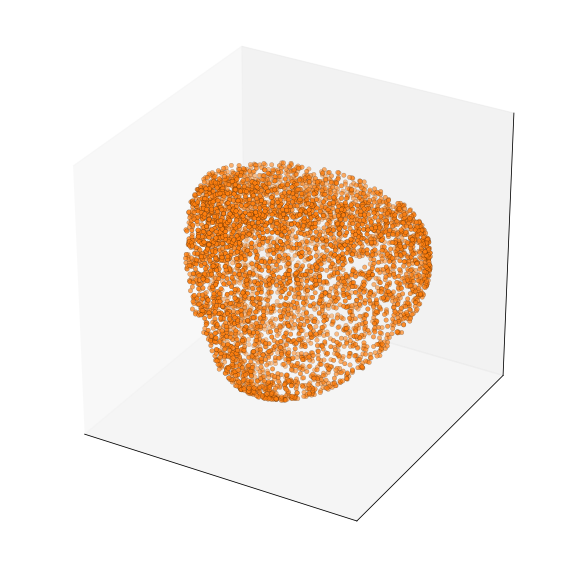

4  Tosses


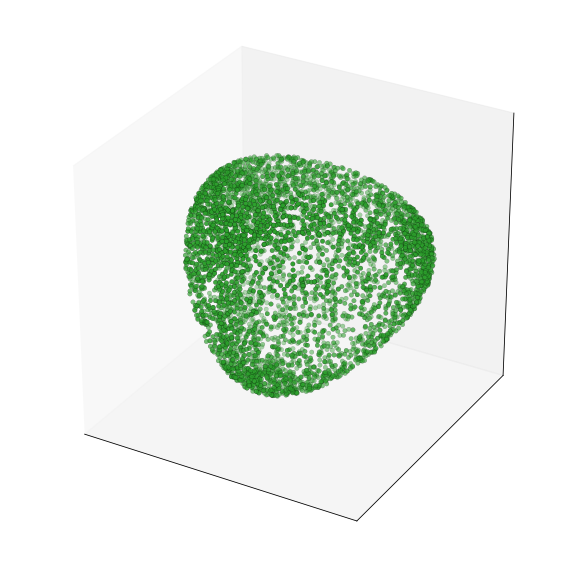

8  Tosses


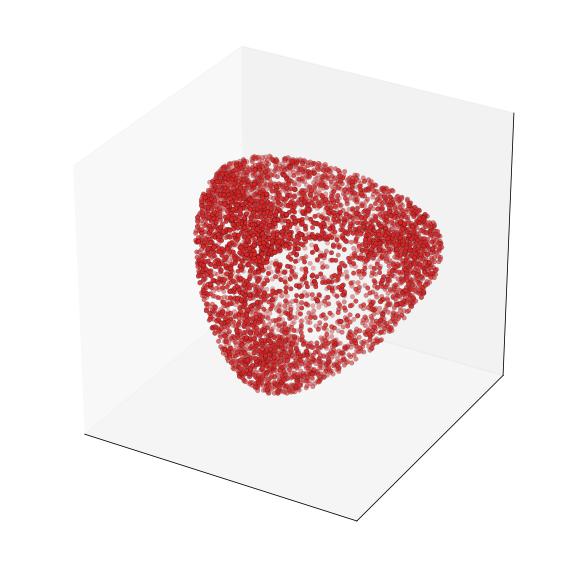

16  Tosses


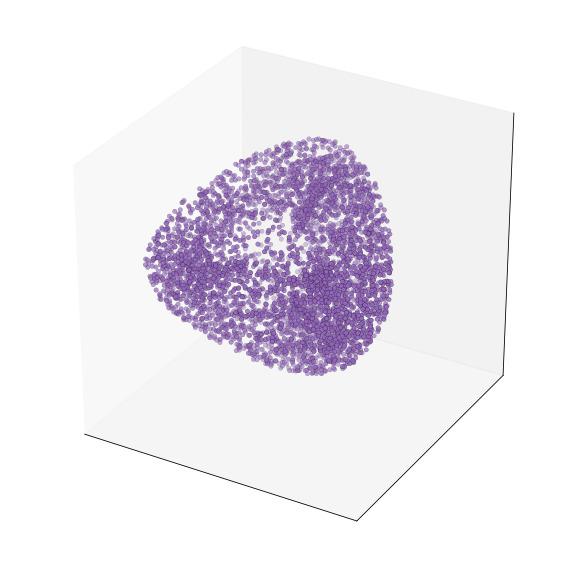

32  Tosses


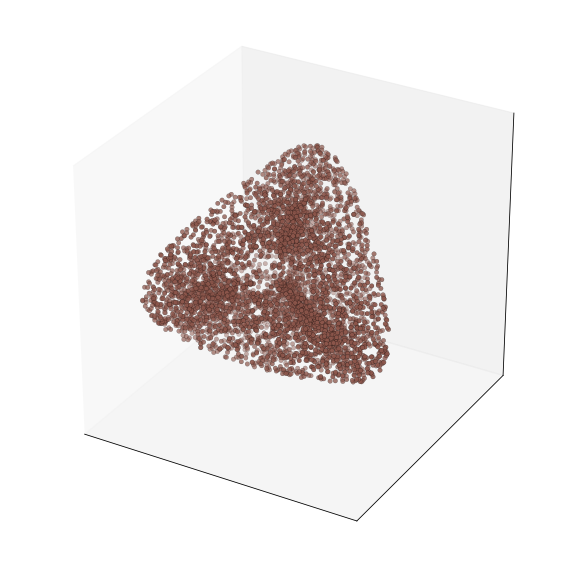

64  Tosses


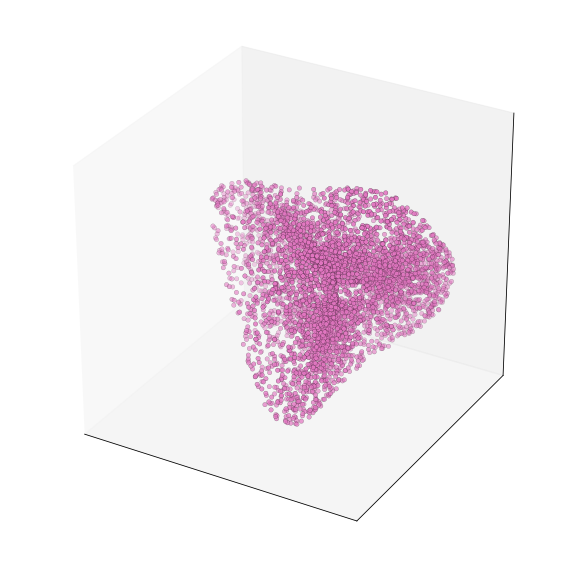

128  Tosses


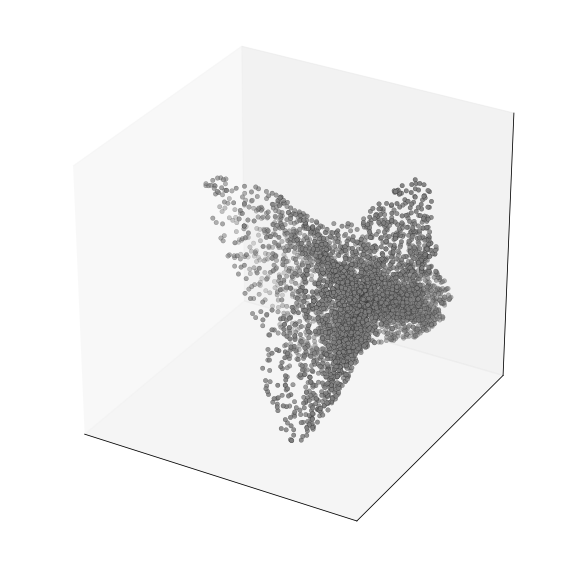

In [10]:
#plot3D(projMatEigs[:,0],projMatEigs[:,1],projMatEigs[:,2],['r' for i in range(len(projMatEigs))])
indx = 0
for row in Replicas:
    CovMat,distances,n,projMatEigs = row
    print(n,' Tosses')
    plot3D(projMatEigs[:,0],projMatEigs[:,1],projMatEigs[:,2],['C'+str(indx) for i in range(len(projMatEigs))])
    indx += 1

In [11]:
CovMatIntensive,DistancesIntensive,nZero = CovMat_replica(Y,n=0)

finished n=0


In [12]:
w,vt = np.linalg.eig(CovMatIntensive)

In [13]:
print(w[0:4].real)
w = abs(w[0:4].real)
v = vt.T.real[0:4]
projMatEigsIntensive = np.dot(v.T,np.diag(np.sqrt(w)))

[ 778.06936047  763.25433965  745.90628468 -101.62536731]


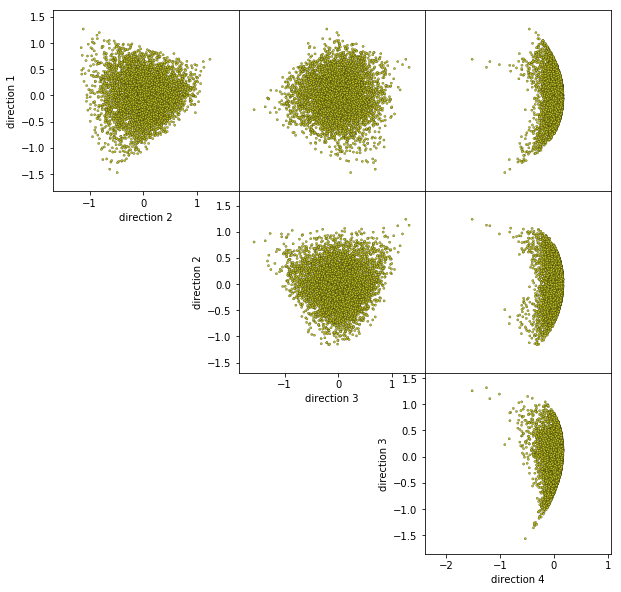

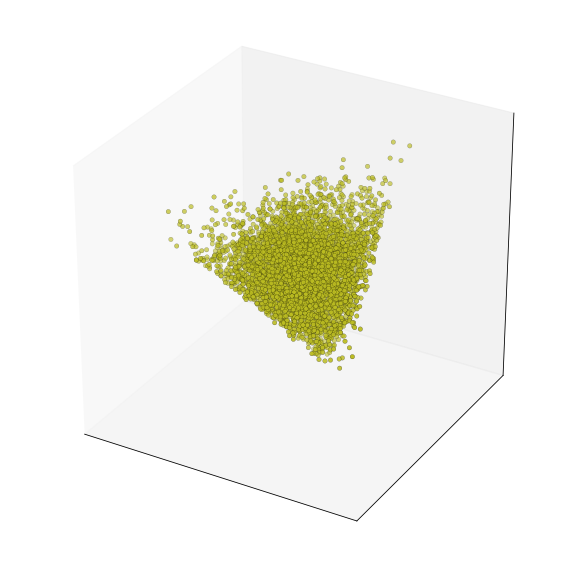

In [14]:
trianglePlot(projMatEigsIntensive,['C'+str(indx) for i in range(len(projMatEigsIntensive))],dim=3)
plot3D(projMatEigsIntensive[:,0],projMatEigsIntensive[:,1],projMatEigsIntensive[:,2],['C'+str(indx) for i in range(len(projMatEigsIntensive))])

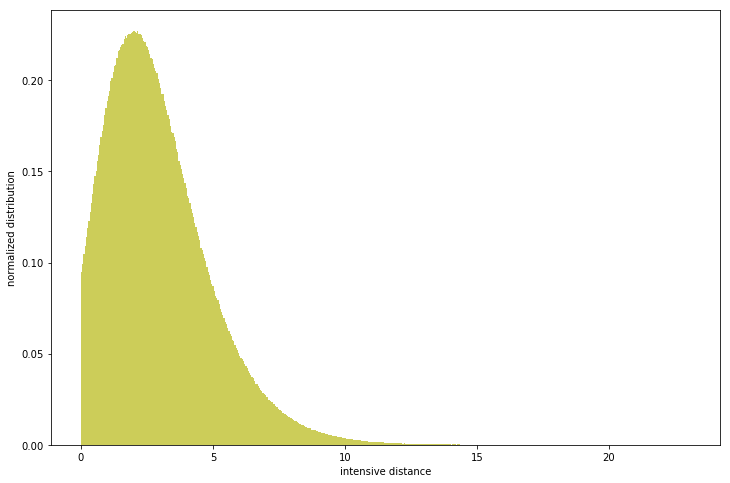

In [15]:
plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(DistancesIntensive,500,normed=1,alpha=0.75,label=str(n)+' throws',color='C'+str(indx))
#plt.legend()
plt.xlabel('intensive distance')
plt.ylabel('normalized distribution')
plt.show()